In [249]:
import rasterio as rio
from rasterio.plot import show
import numpy as np

In [250]:
data = r'W:\NLCDFS1\lcnext\Assessment_2023\data\landsat_level_3_products\DSWE\h16v04\2021\LC08_CU_016004_20210927_20211004_02_DIAG.tif'

1


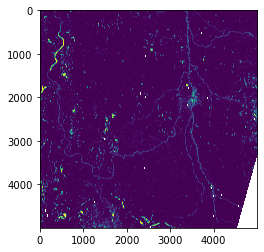

In [251]:
with rio.open(data) as dswe:
    dswe_data = dswe.read(1,  masked=True)
    dswe.profile
    print(dswe.count)
    show(dswe_data)

In [252]:
out_data = {}

In [253]:
out_data = np.zeros_like(dswe_data, dtype=np.uint16)

In [254]:
# confident water
out_data[np.where((dswe_data == 1111) | (dswe_data == 10111) | (dswe_data == 11011) | (dswe_data == 11101) | (dswe_data == 11110) | (dswe_data == 11111))] = 1

out_data[np.where((dswe_data == 111) | (dswe_data == 1011) | (dswe_data == 1101) | (dswe_data == 1110) | (dswe_data == 10011) | (dswe_data == 10101) | (dswe_data == 10110) | (dswe_data == 11001) | (dswe_data == 11010) | (dswe_data == 11100))] = 2

out_data[np.where(dswe_data == 11000)] = 3

out_data[np.where((dswe_data == 11) | (dswe_data == 101) | (dswe_data == 101) | (dswe_data == 110) | (dswe_data == 1001) | (dswe_data == 1010) | (dswe_data == 1100) | (dswe_data == 10000) | (dswe_data == 10001) | (dswe_data == 10010) | (dswe_data == 10100))] = 4


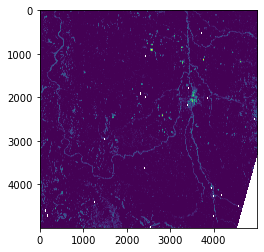

<AxesSubplot:>

In [255]:
show(out_data)

In [256]:
out_data.shape

(5000, 5000)

In [248]:
# Register GDAL format drivers and configuration options with a
# context manager.
with rio.Env():

    # Write an array as a raster band to a new 8-bit file. For
    # the new file's profile, we start with the profile of the source
    profile = dswe.profile
    

    # And then change the band count to 1, set the
    # dtype to uint8, and specify LZW compression.
    profile.update(
        dtype=rio.uint8,
        count=1,
        nodata=0,
        compress='lzw')

    with rio.open('dswe_test2.tif', 'w', **profile) as dst:
        dst.write(out_data.astype(rio.uint8), 1)

# At the end of the ``with rasterio.Env()`` block, context
# manager exits and all drivers are de-registered.